## <center>**Analysis on Titanic DataSet**</center>
![Cover](https://themuseum.ca/wp-content/uploads/2019/04/Titanic_1600x484.jpg)

## Introduction
Le dataset Titanic est un ensemble de données classique utilisé pour l'analyse de données. Il contient des informations sur les passagers du célèbre navire Titanic, y compris s'ils ont survécu ou non au naufrage.


## Objectif
L'objectif de cette analyse est de comprendre les caractéristiques des passagers qui ont survécu et d'explorer les tendances et les corrélations dans les données.

## Chargement des données
Pour commencer, chargeons les données et examinons les premières lignes pour comprendre la structure du dataset.



In [1]:
# import pandas library
import pandas as pd

Assurez-vous de remplacer 'chemin/vers/votre/fichier/titanic.csv' par le chemin d'accès réel vers votre fichier Titanic CSV.

In [2]:
# Charger le dataset Titanic
data = pd.read_csv('Titanic.csv')

In [3]:
# Afficher les premières lignes du dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Afficher les dernières lignes du dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Exploration des données
Effectuons une exploration initiale des données pour comprendre les types de variables, les valeurs manquantes, et les statistiques descriptives.

In [5]:
# Informations sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Statistiques descriptives
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Analyse des survivants
Explorons les caractéristiques des passagers qui ont survécu par rapport à ceux qui n'ont pas survécu.

In [8]:
# Importer matplotlib et seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

##### Nombre de survivants

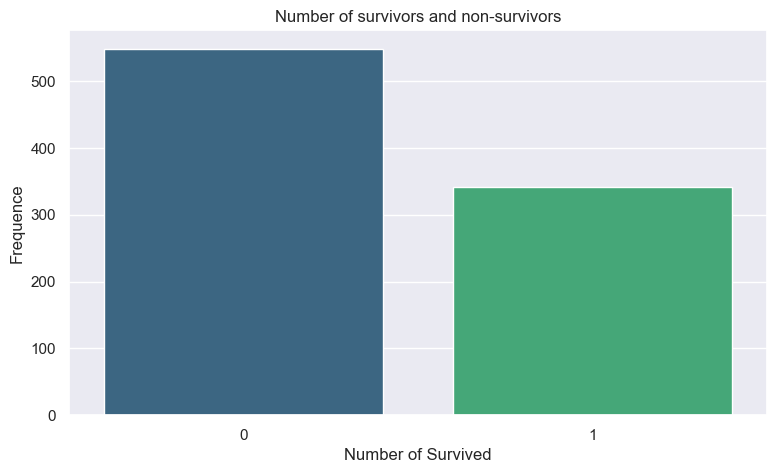

In [9]:
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Survived', palette="viridis")
plt.xlabel("Number of Survived")
plt.ylabel("Frequence")
plt.title("Number of survivors and non-survivors")
plt.show()

## **Comments:**

According to the figure above, the ship Titanic, after the wreck, recorded fewer survivors. The statistics are as follows:
   * Over 500 survivors 
   * Approx. 300 non-survivors

#### Tracer un diagramme circulaire


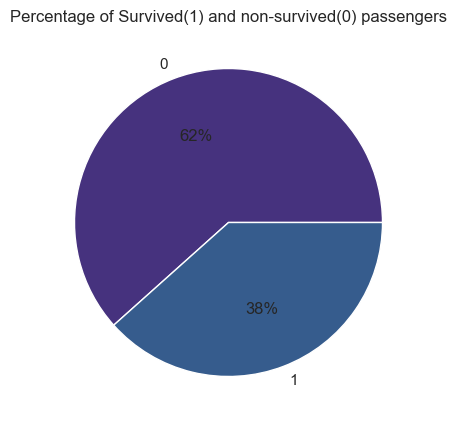

In [11]:
# Tracer un diagramme circulaire
plt.figure(figsize=(9,5))
colors = sns.color_palette("viridis")
dataOfSurvived = data.Survived.value_counts()
plt.pie(dataOfSurvived.values, labels=dataOfSurvived.index, colors=colors, autopct="%0.0f%%")
plt.title("Percentage of Survived(1) and non-survived(0) passengers")
plt.show()

## **Comments:** 

This figure shows us that: Non-survivors far outnumber survivors, almost twice as much as survivors. 
  1. Survivors represent a percentage of 32%.
  2. Non-survivors represent a percentage of 62%.



##### Analyse des survivants en fonction d'autres variables


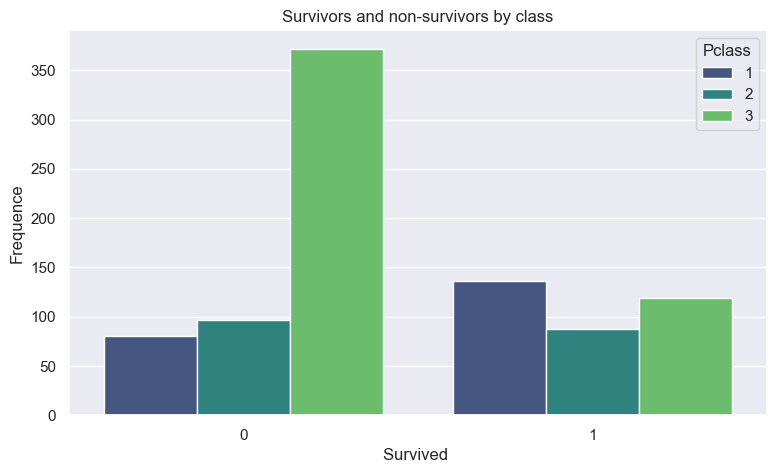

In [12]:
# Analyse des survivants en fonction d'autres variables
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Survived', hue='Pclass', palette='viridis')
plt.ylabel("Frequence")
plt.xlabel("Survived ")
plt.title("Survivors and non-survivors by class")
plt.show()

## Comments : 

From this breakdown of survivors and non-survivors by class on the Titanic, we have some startling revelations: 

In relation to the number of passengers registered in each class, we note that : 

* 1st Class: More first-class passengers survived.
* 2nd Class: More passengers did not survive the overheating.
* 3rd Class: More passengers died. More than twice as many as those who survived.

Given the conditions of 3rd Class, we note that many passengers died in this class.

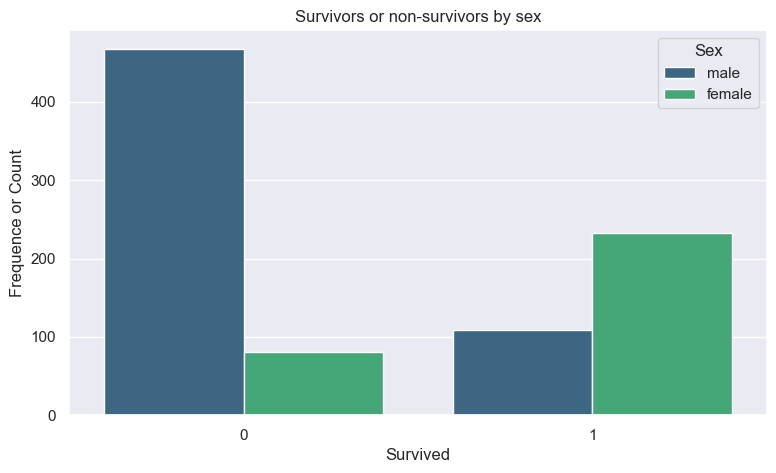

In [13]:
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Survived', hue='Sex', palette='viridis')
plt.xlabel("Survived")
plt.ylabel("Frequence or Count")
plt.title("Survivors or non-survivors by sex")
plt.show()

## Comments: 

* More men died than women. This may be due to the fact that women had priority in the rescue.
* Among the survivors, there were more women than men. We can say that women represented twice the number of men.
* Among the non-survivors, men represented the mass. There were a lot of men. Nearly 450 men.

##### Analyse des Âges des Passagers

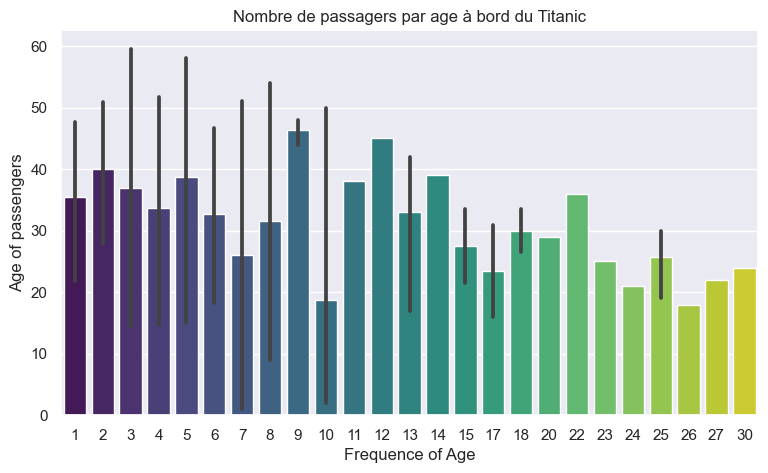

In [14]:
# Analyse des Âges des Passagers
valuesAge = data["Age"].value_counts().sort_values(ascending=False).values
indexAge = data["Age"].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(9,5))
sns.barplot(x = valuesAge , y= indexAge, palette='viridis')
plt.xlabel("Frequence of Age")
plt.ylabel("Age of passengers")
plt.title("Nombre de passagers par age à bord du Titanic")
plt.show()

## **Comments:**

* 9 passengers between 40 and 50 years old 
* 1 passenger aged 35 
* 2 passengers aged 40 
* 30 passengers aged between 20 and 30

##### Analyse des survivants par âge

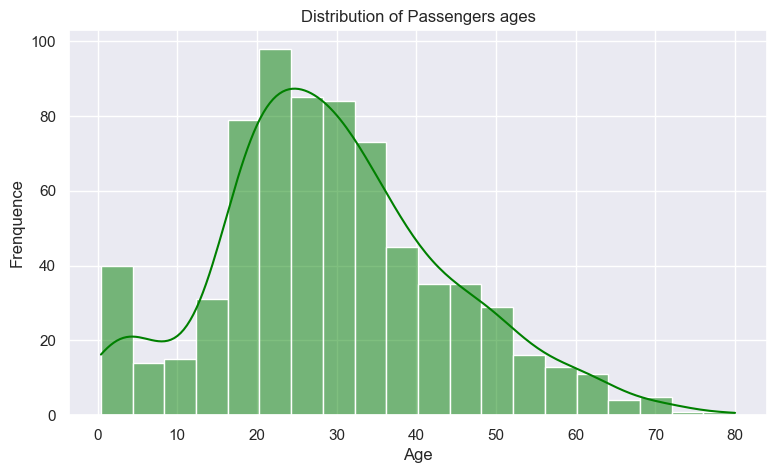

L'indicateur skewness est égal à 0.38910778230082704: 


In [15]:
# # Distribution des âges des passagers
plt.figure(figsize=(9,5))
sns.histplot(x=data['Age'], color='green', kde=True)
plt.title("Distribution of Passengers ages")
plt.ylabel("Frenquence")
plt.xlabel("Age")
plt.show()

print("L'indicateur skewness est égal à {}: ".format(data['Age'].skew()))

## Comments: 

According to this figure : 

* the majority of passengers are between 19 and 40 years old 
* The distribution seems asymmetrical to me since the tail seems to extend further to the right. This means that the values are far from the average. This is what we can see from this figure 


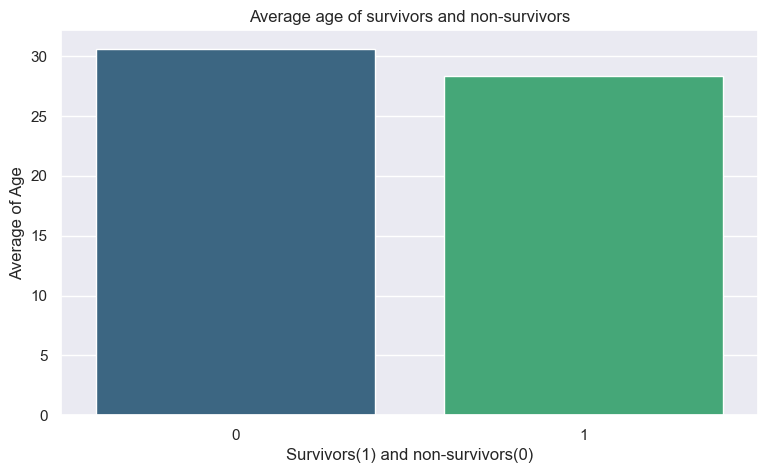

,Survived,AverageOfAge
0,0,30.626179
1,1,28.343690


In [16]:
AvgAge_of_passengers = data.groupby('Survived')['Age'].mean().to_frame().reset_index().rename(columns={'Age':'AverageOfAge'})

plt.figure(figsize=(9,5))
sns.barplot(x=AvgAge_of_passengers['Survived'],y=AvgAge_of_passengers['AverageOfAge'], palette='viridis')
plt.title("Average age of survivors and non-survivors")
plt.xlabel("Survivors(1) and non-survivors(0)")
plt.ylabel("Average of Age")
plt.show()

AvgAge_of_passengers

## Commentaires : 
Cette figure nous montre la moyenne d'age des survivants et des non-survivants :
* Soit 30.62 (non survivants)
* Soit 28.34 (survivants)

In [17]:
# create a new dataframe for categorial variables
categorical_dataframe = data[["Survived","Pclass","Sex","SibSp","Parch","Embarked"]]

In [ ]:
categorical_dataframe.info()

In [18]:
# changer les valeurs de la colonne Survived avec le mapping
survived_dict ={
    0 : 'non-survivors',
    1 : 'survivors'
}

categorical_dataframe.loc[:,'Survived'] = categorical_dataframe['Survived'].map(survived_dict)

In [19]:
# changer les valeurs de la colonne Pclass avec le mapping
Pclass_dict = {
    1:'First Class',
    2:'Second Class',
    3:'Third Class'
}

categorical_dataframe.loc[:,'Pclass'] = categorical_dataframe['Pclass'].map(Pclass_dict)

In [20]:
# changer les valeurs de la colonne Embarked avec le mapping
Embarked_dict = {
    'S':'Southampton',
    'C':'Cherbourg',
    'Q':'Queenstown'
}

categorical_dataframe.loc[:,'Embarked'] = categorical_dataframe['Embarked'].map(Embarked_dict)

In [21]:
# Convert {SibSp, Parch} to object
categorical_dataframe.loc[:,'SibSp'] = categorical_dataframe['SibSp'].astype(str)
categorical_dataframe.loc[:,'Parch'] = categorical_dataframe['Parch'].astype(str)

In [22]:
categorical_dataframe

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,non-survivors,Third Class,male,1,0,Southampton
1,survivors,First Class,female,1,0,Cherbourg
2,survivors,Third Class,female,0,0,Southampton
3,survivors,First Class,female,1,0,Southampton
4,non-survivors,Third Class,male,0,0,Southampton
...,...,...,...,...,...,...
886,non-survivors,Second Class,male,0,0,Southampton
887,survivors,First Class,female,0,0,Southampton
888,non-survivors,Third Class,female,1,2,Southampton
889,survivors,First Class,male,0,0,Cherbourg


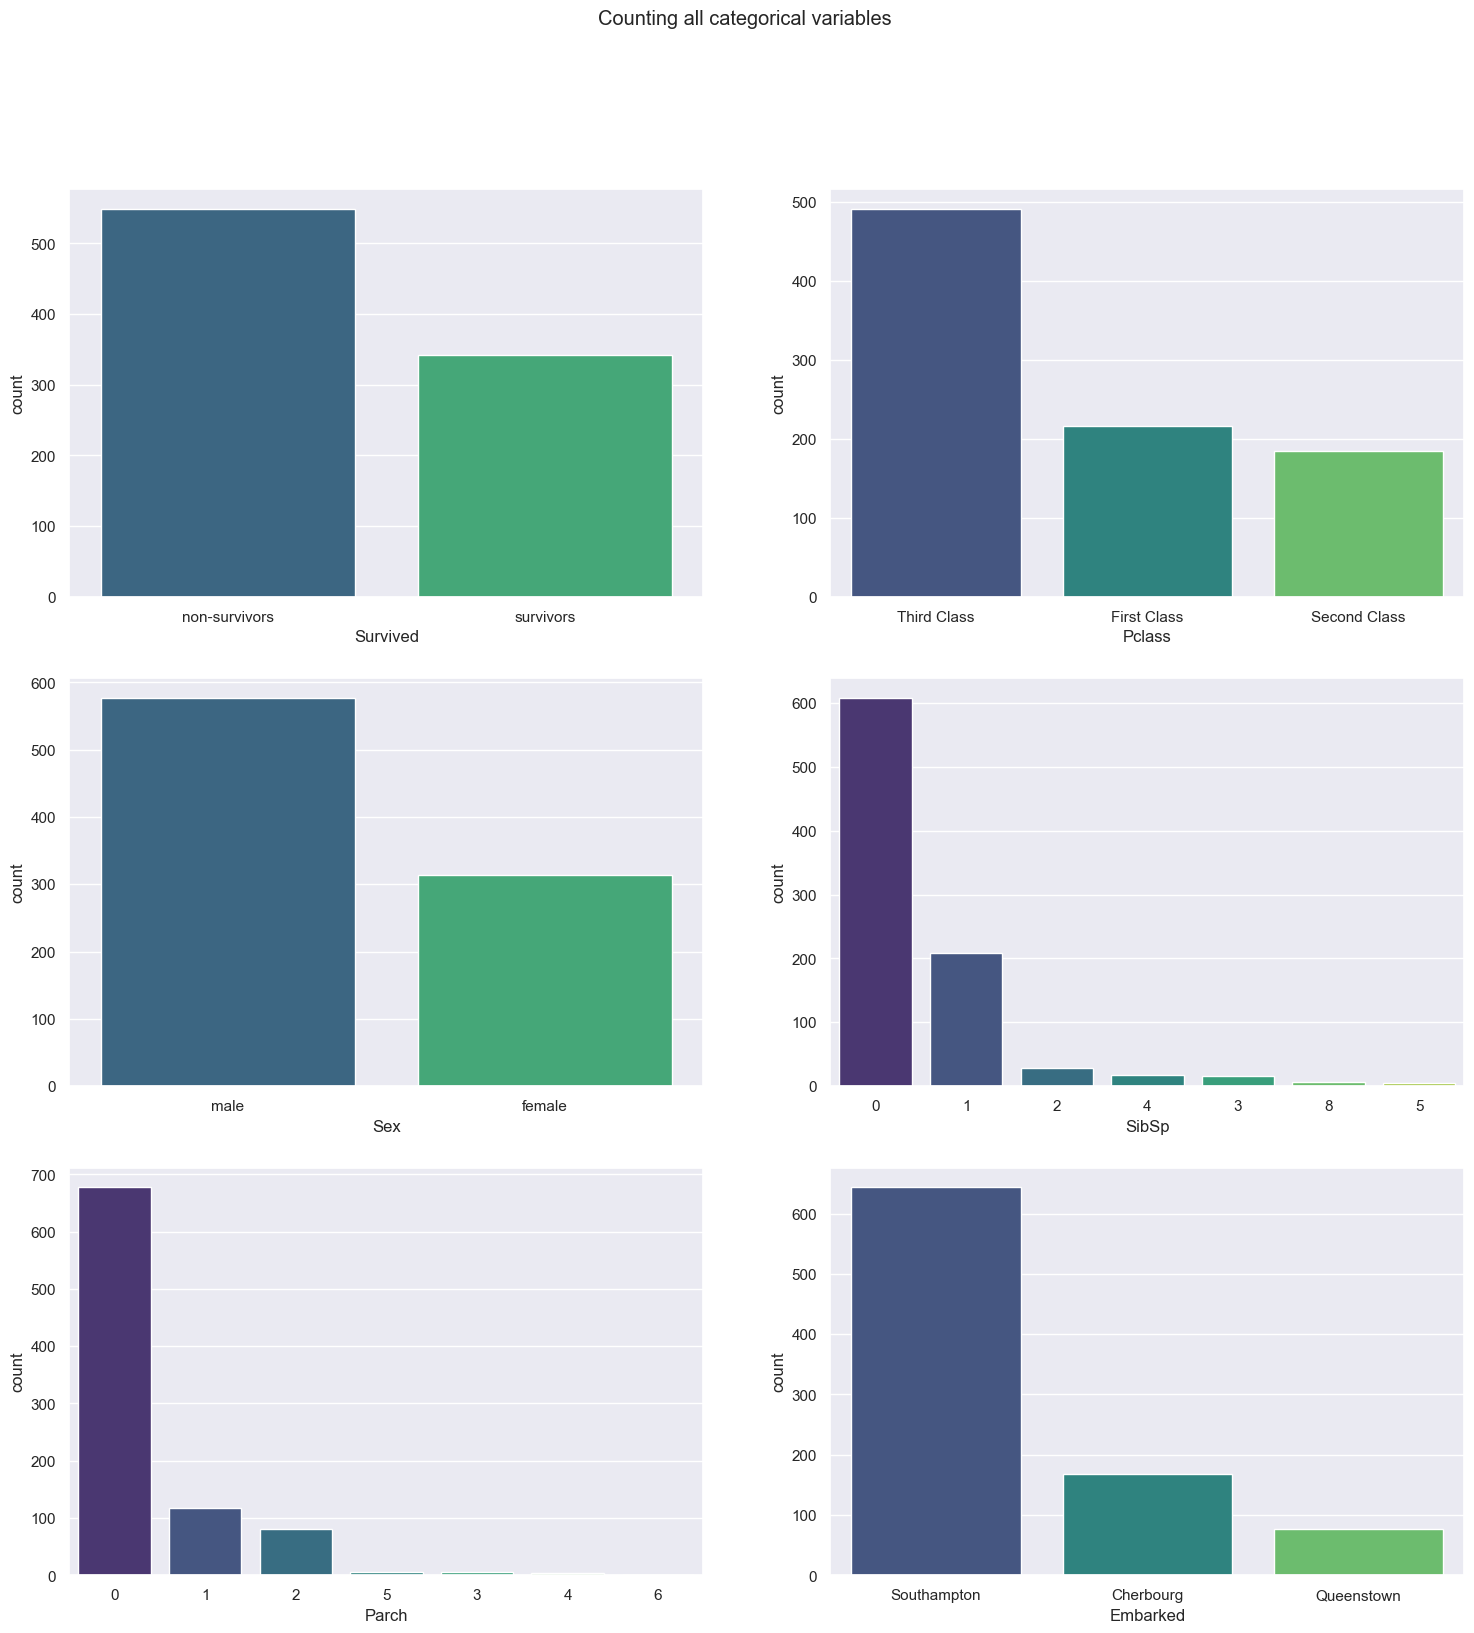

In [23]:
fig, axes = plt.subplots(3,2, figsize=(18,18))
fig.suptitle('Counting all categorical variables')

sns.countplot(ax=axes[0,0], x='Survived',data=categorical_dataframe ,order=categorical_dataframe['Survived'].value_counts().index,palette='viridis')
sns.countplot(ax=axes[0,1], x='Pclass', data=categorical_dataframe,order=categorical_dataframe['Pclass'].value_counts().index,palette='viridis')
sns.countplot(ax=axes[1,0], x='Sex', data=categorical_dataframe, order=categorical_dataframe['Sex'].value_counts().index,palette='viridis')
sns.countplot(ax=axes[1,1], x='SibSp', data=categorical_dataframe, order=categorical_dataframe['SibSp'].value_counts().index,palette='viridis')
sns.countplot(ax=axes[2,0], x='Parch', data=categorical_dataframe, order=categorical_dataframe['Parch'].value_counts().index,palette='viridis')
sns.countplot(ax=axes[2,1], x='Embarked', data=categorical_dataframe, order=categorical_dataframe['Embarked'].value_counts().index,palette='viridis')

plt.show()

## Comments: 

According to this figure, we have : 

   1. More **non-survivors** than **survivors**.
   2. More **3-class** passengers, followed by **1-class** and then **2-class**.
   3. More **males** than **females** 
   4. With reference to the number of siblings (brothers, sisters, half-brothers, half-sisters) or spouses (husbands or wives) each passenger had on board the Titanic, we have the following rankings: 0, 1, 2, 4, 3, 8, 5
   5. For the number of parents or children (fathers, mothers, sons, daughters, fathers-in-law, mothers-in-law, adopted daughters or sons) each passenger had on board the Titanic, we have the following rankings: 0, 1, 2, 5, 3, 4, 6
   6. We have more passengers embarking from **Southampton**, followed by **Cherbourg** and **Queenstown**.


##### Analyse des Tarifs et des Ports d'Embarquement

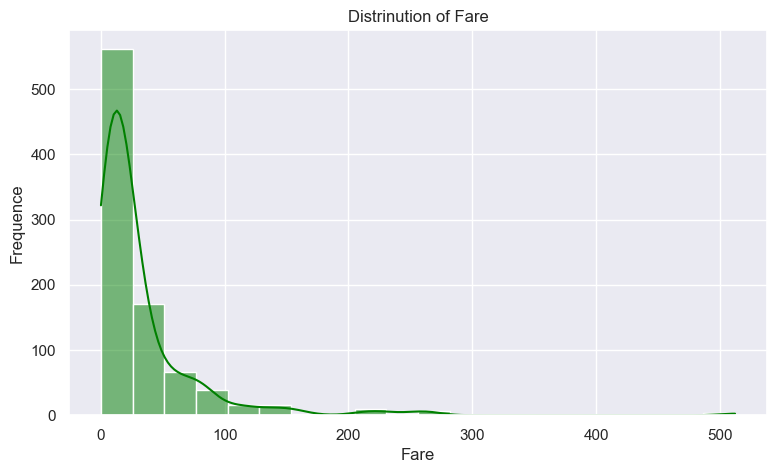

L'indicateur skewness est égale : 5


In [35]:
# Distribution des tarifs payés par les passagers
plt.figure(figsize=(9,5))
sns.histplot(data['Fare'], color='green', kde=True, bins=20)
plt.title("Distrinution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequence")
plt.show()


print("L'indicateur skewness est égale : {}".format(round(data['Fare'].skew())))

## Comments : 

* D'après la figure suivante, notre distribution est asymétrique. Si nous voyons l'indicateur skewness, cet indicateur est positif ce qui veut dire que la queue est plus étendu vers la droite et que les valeurs sont plus éloignés de la moyenne à droite.

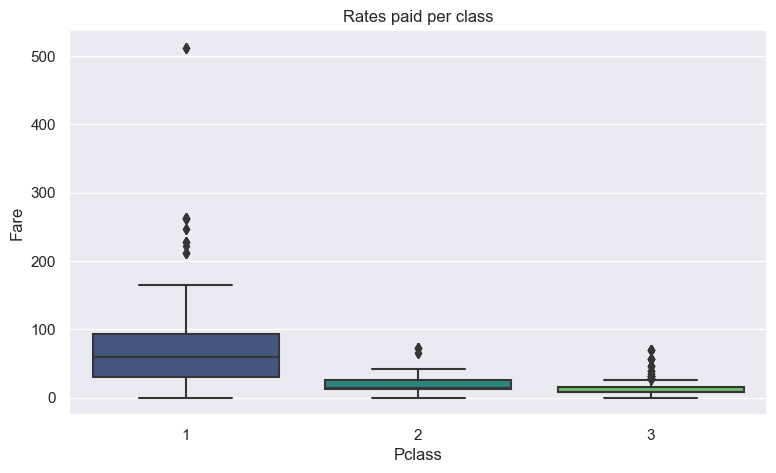

In [27]:
# Analyse des tarifs par classe
plt.figure(figsize=(9,5))
sns.boxplot(data=data, x='Pclass', y='Fare', palette='viridis')
plt.title('Rates paid per class')
plt.show()

## Commentaires : 

* D'après la figure suivante, la tarifications est plus élévée pour la premiere, suivi de la deuxière puis la troisième classe. Nous avons beaucoup de valeurs extremes dans les différentes classes.

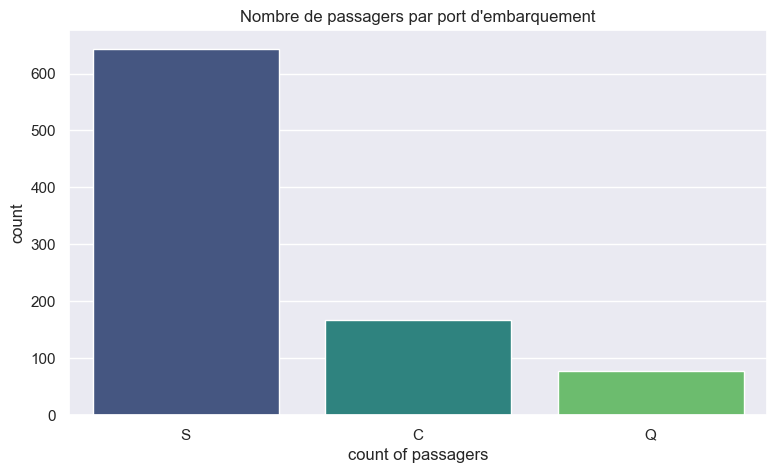

,Embarked,count
0,S,644
1,C,168
2,Q,77


In [32]:
# Analyse des passagers par port d'embarquement
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Embarked', palette='viridis')
plt.title('Nombre de passagers par port d\'embarquement')
plt.xlabel('count of passagers')
plt.show()

Embarked_data = data['Embarked'].value_counts().to_frame().reset_index()
Embarked_data

## Comments: 

We have, according to this illustration: 
* 644 passengers from Southampton (S)
* 168 passengers from Cherbourg (C)
* 77 passengers from Queenstown (Q)

C: Cherbourg - Passengers who embarked in Cherbourg, France.
Q: Queenstown (now known as Cobh) - Passengers who embarked in Queenstown, Ireland.
S: Southampton - Passengers who embarked in Southampton, England.

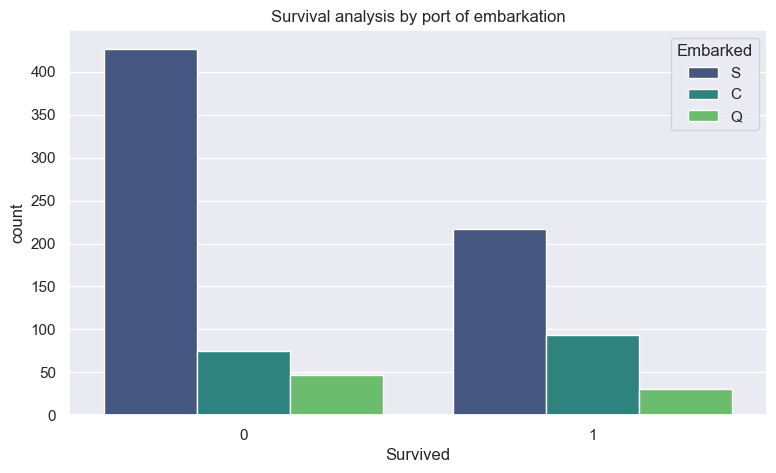

In [34]:
# Analyse de la survie en fonction du port d'embarquement
plt.figure(figsize=(9,5))
sns.countplot(data=data, x='Survived', hue='Embarked', palette='viridis')
plt.title("Survival analysis by port of embarkation")
plt.show()

## Comments: 

From the illustration above, we can conclude that:
1. **For survivors**

     * (S) Southampton
     * (C) Cherbourg
     * (Q) Queenstown
2. **For non survivors** * (S) Southampton

     * (S) Southampton
     * (C) Cherbourg
     * (Q) Queenstown

Vous pouvez continuer avec des analyses personnelles. Nous vous laissons la possibilité de porsuivre cette analyse.

##  By AnalysisTitanic_Datasciencester_Spaak